# **Introduction**
Our project aims to determine the **best** neighborhood in Pittsburgh based on pedestrian safety during daily travel. We focused on this metric after exploring the Western Pennsylvania Regional Data Center (WPRDC), where we found relevant datasets to assess pedestrian safety. In brainstorming the project, we initially considered using “walkability” as our main metric, assessing areas with features like sidewalks, crosswalks, and an arbitrary dataset analyzing "walkscore". However, after further research, we realized that there were datasets that more accurately represented pedestrian safety statistics rather than general walkability. This led us to focus on identifying the neighborhood where pedestrians are least likely to encounter risks in their day-to-day travel.

---

## **Metric**
For our metric, we decided to base the best neighborhood on which is the safest for pedestrians.

### Sub-Metric: [Crosswalks](https://data.wprdc.org/dataset/city-of-pittsburgh-markings)
    Bestness will be based on:
        - The most crosswalks
        - People live there
        - The crosswalks are active


### Sub-Metric: [Speed Bumps](https://data.wprdc.org/dataset/city-of-pittsburgh-speed-humps/resource/37b2ac41-ae8e-4de1-8405-157e05dc3640)
    Bestness will be based on:
        - The highest quantity of speed bumps 



### Sub-Metric: [Traffic Signs](https://data.wprdc.org/dataset/city-traffic-signs/resource/d078a6b5-83a3-4723-a3a9-5371cfe1cc0c)
    Bestness will be based on:
        - Amount of Traffic Signs
        - Type of Traffic Signs
        - Type of mounting fixture



---

## **The Best Neighbourhood**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Crosswalks

![](Images/Crosswalk.png)


In [8]:
walks = pd.read_csv("CSV-Files/Crosswalks.csv")

# Removes any inactive crosswalks using a mask
walksActive = walks[walks["inactive"] != "t"]

# Put the active crosswalks into a dataframe
crosswalkCounts = pd.DataFrame(walksActive['neighborhood'].value_counts().reset_index())

# Sort the dataframe in descending order
crosswalkCounts = crosswalkCounts.sort_values(by='count', ascending=False)

crosswalkCounts

,neighborhood,count
0,Central Business District,402
1,South Side Flats,262
2,Squirrel Hill South,239
3,Bloomfield,192
4,Shadyside,190
...,...,...
83,Fineview,3
84,Summer Hill,3
85,Chartiers City,1
86,St. Clair,1


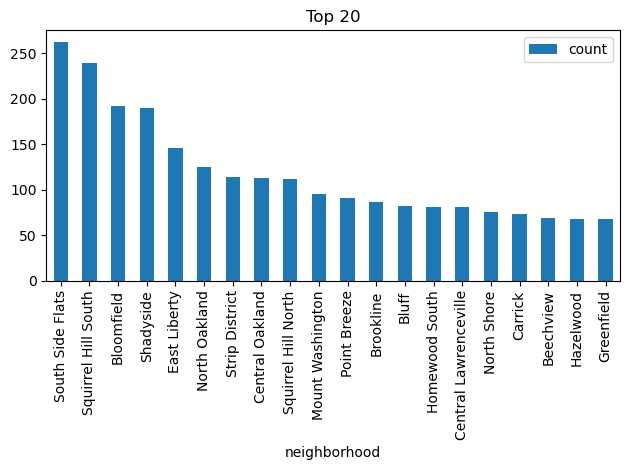

In [9]:
# Remove the Business District
crosswalkCounts = crosswalkCounts.iloc[1:]

# Take the top 20 for the data
crosswalkCounts = crosswalkCounts.head(20)

# Plot a bar graph for visual
crosswalkCounts.plot(kind="bar",x="neighborhood",y="count",title="Top 20")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Speed Bumps

![](Images/SpeedBumps.png)


In [4]:
speedHumps = pd.read_csv("CSV-Files/SpeedHumps.csv")
speedHumps.head()

,_id,id,hump_id,locator_address_number,locator_street,pavement,speed_hump_material,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,430808404,1,4337.0,Saline St,9257,Asphalt,Squirrel Hill South,5,14,42003141400,3,14,4,2-15,40.419835,-79.926062
1,34,1520886592,2,NaN,Summerset Dr,15346,NaN,Squirrel Hill South,5,14,42003141400,3,14,4,2-20,40.425040,-79.912040
2,67,858537521,3,511.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.456746,-79.954521
3,68,297775878,4,547.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.457333,-79.954899
4,69,1061197751,5,593.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.458061,-79.955355


In [5]:
newHumps = pd.DataFrame(speedHumps['neighborhood'].value_counts().reset_index())
newHumps = newHumps.rename(columns = {'neighborhood':'Neighborhoods','count':'Count'})
newHumps

,Neighborhoods,Count
0,Squirrel Hill South,18
1,Carrick,9
2,Polish Hill,6
3,North Oakland,6
4,Upper Hill,4
5,Brookline,4
6,Homewood South,4
7,South Side Slopes,4
8,Perry North,4
9,Garfield,3


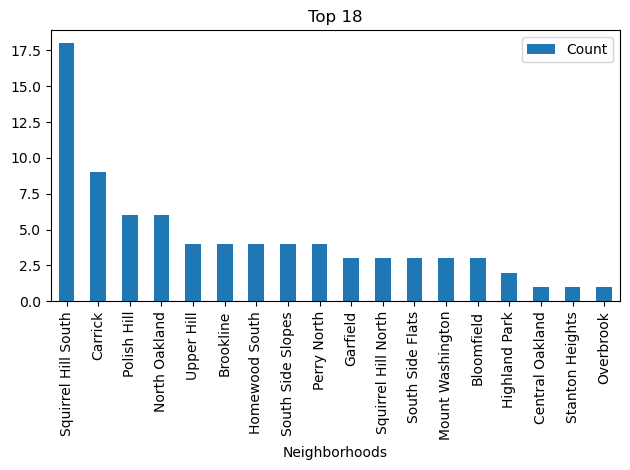

In [6]:
newHumps.plot(kind='bar',x='Neighborhoods',y='Count',title = 'Top 18')

plt.tight_layout()

## Traffic Signs

![](Images/TrafficSigns.png)


In [7]:
traffic_signs = pd.read_csv("CSV-Files/TrafficSigns.csv")
traffic_signs.head()

,_id,id,mutcd_code,address_number,street,city,mounting_fixture,date_installed,description,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,1673225887,R1-1,900,California Ave,Pittsburgh,Wood Pole,NaN,Stop,California-Kirkbride,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-9,40.459325,-80.019057
1,2,668379452,R1-1,107,Glenbury St,Pittsburgh,Channel,NaN,Stop,Overbrook,4.0,32.0,4.200332e+10,5.0,32.0,3.0,4-25,40.386955,-80.002161
2,3,174468442,R1-1,5325,Forbes Ave,Pittsburgh,Wood Pole,NaN,Stop,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-8,40.439828,-79.934814
3,4,1517107112,R1-1,1437,N St Clair St,Pittsburgh,Channel,NaN,Stop,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478685,-79.919270
4,5,1374142598,WF,228,Isabella St,Pittsburgh,Metal Pole,1995-02-14,Wayfinding Signage,North Shore,1.0,22.0,4.200356e+10,6.0,22.0,1.0,1-20,40.448482,-80.000671


In [10]:
traffic_sign_counts = pd.DataFrame(traffic_signs['neighborhood'].value_counts().reset_index())
traffic_sign_counts.columns = ['neighborhood', 'count']
traffic_sign_counts = traffic_sign_counts.sort_values(by='count', ascending=False)
traffic_sign_counts = traffic_sign_counts.head(20)
traffic_sign_counts

,neighborhood,count
0,South Side Flats,3672
1,Bloomfield,3627
2,Central Business District,3491
3,Shadyside,3370
4,Squirrel Hill South,3281
5,Brookline,2256
6,Carrick,2044
7,Central Lawrenceville,1970
8,Squirrel Hill North,1895
9,East Liberty,1759


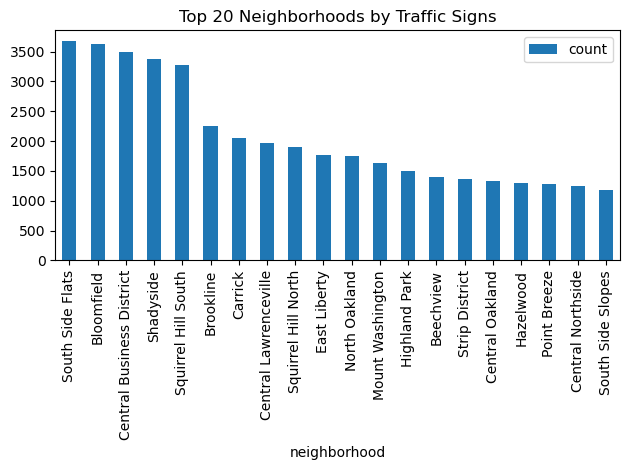

In [13]:
traffic_sign_counts.plot(kind="bar", x="neighborhood", y="count", title="Top 20 Neighborhoods by Traffic Signs")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## **Analysis Conclusion**

When it comes to settling down in a new neighborhood, there is one very important factor that all potential home buyers must consider: Would I be safe in this neighborhood? In other words: Would I feel safe enough to walk to the nearest store? These are the questions that our datasets answered with one clear conclusion: Live in Squirrel Hill South!
    
According to our first dataset, which quantified pedestrian safety in terms of the amount of crosswalks, Squirrel Hill South was the second safest neighborhood, only surpassed by South Side Flats, which has 9% more crosswalks.
    
Crosswalks, to drivers, represent an additional cross-cutting lane of traffic that drivers should treat as any other form of traffic; Crosswalks are lawful, psychological safeguards that protect pedestrians on their everyday commutes.
    
Traffic signs are another form of psychological barriers that work in tandem with crosswalks to provide pedestrians safe passage to their destination. In our third dataset, which tracked the number of traffic signs in a neighborhood, South Side Flats, yet again, had the highest count, with roughly 12% more traffic signs than Squirrel Hill South, which had the fourth highest count. However, there isn’t anything physically preventing drivers from passing over these painted safeguards or ignoring these neon signs, and many drivers do, accidentally or purposefully, pass over these lines, ignore signs, and strike pedestrians.
    
Speed humps, which our second dataset measures, are vital in pedestrian safety. Squirrel Hill South was recorded to have the most, at double the amount of Carrick, which is in second place. South Side Flats, another candidate that was common in the top five data entries of our two other datasets, fell to twelfth in the speed humps dataset. This discrepancy in the data was the main reason South Side Flats was not chosen as the safest neighborhood; While psychological protections for pedestrians, such as traffic signs and crosswalks, provide a large cushion of safety for both drivers and pedestrians, physical hindrances are more effective at facilitating a safe road environment because it forces drivers to listen and adhere to speed limits and makes them more aware of the road.
    
Considering this discrepancy, Squirrel Hill South is the best neighborhood for pedestrian safety because of its vast quantity of speed humps, and thousands of traffic signs and crosswalks, which work in tandem to uphold safety on the road, for both drivers and pedestrians.


## **Conclusion**
Reflect on how the data-driven determination of “best neighborhood” is the same or different from your personal favorite neighborhood. Each member of the group should write their own response to.


**Ryan:** While I haven't been in a whole lot of different neighborhoods in Pittsburgh my favorite one that I've been to is Shadyside because of its restaurants and shops. The reason Shadyside couldn't be picked as the best is because it noticeably has no active speedbumps and also falls slightly behind in the sub-metric of Crosswalks by a small margin. Shadyside does however have slightly more Traffic Signs than Squirrel Hill South but the difference between the top neighborhoods in that category was very small meaning Squirrel Hill South still is the safest. 

**Ben:** My favorite neighborhood is North Oakland, simply because it is the neighborhood I have the most experience and familiarity with. North Oakland also has many quick-service restaurants and different collegiate activities and opportunities that I enjoy. Our "best neighborhood" was determined by considering which neighborhood was the safest, whereas my personal determination was based on what restaurants and activities the neighborhood had to offer. While North Oakland was featured on the datasets, it only attained a mid-level ranking among other neighborhoods, whereas Squirrel Hill South consistently ranked in the top 5 neighborhoods of each dataset. 

**Krish:** My favorite neighborhood in Pittsburgh is the Strip District because of its vibrant markets and unique shops. However, the Strip District couldn't be picked as the safest by our metrics because it has fewer traffic signs and crosswalks than other neighborhoods, making it less pedestrian-friendly. Squirrel Hill South still ranks as the safest overall. The Strip District's lack of safety features like active speed bumps,  adequate crosswalks, and traffic signs is a noticeable drawback, making it not the best neighborhood in Pittsburgh.